## Partie : Prediction basée sur les pixels

## Importation des bibliothèques

In [3]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from pylab import *
import random
from sklearn.utils import shuffle

## Importation des données

In [ ]:
images = []
y = []
lire_images("./Training/Banana", images, y,0)
lire_images("./Training/Corn", images, y,1)
lire_images("./Training/Strawberry", images, y,2)
lire_images("./Training/Raspberry", images, y,3)
lire_images("./Training/Clementine", images, y,4)
lire_images("./Training/Pear Williams", images, y,5)
lire_images("./Training/Nectarine", images, y,6)
lire_images("./Training/Orange", images, y,7)
lire_images("./Training/Lychee", images, y,8)
lire_images("./Training/Kiwi", images, y,9)
lire_images("./Training/Blueberry", images, y,10)
lire_images("./Training/Cherry 1", images, y,11)
lire_images("./Training/Apricot", images, y,12)
lire_images("./Training/Lemon", images, y,13)
lire_images("./Training/Watermelon", images, y,14)
lire_images("./Training/Tangelo", images, y,15)
lire_images("./Training/Plum", images, y,16)
lire_images("./Training/Peach", images, y,17)
lire_images("./Training/Kaki", images, y,18)
lire_images("./Training/Mango", images, y,19)


fruits = ["Banane","Mais","Fraise","Framboise","Clementine","Poire",
          "Nectarine","Orange","Lychee","Kiwi","Mirtille","Cerise",
          "Abricot","Citron","Melon","Tangelo","Plum","Peche","Kaki","Mangue"]

K = len(fruits)

In [6]:
print(np.shape(images))

(9651, 50, 50, 3)


## Fonctions de préparation des données

In [9]:
def transformer_en_gris(img_orig):
    im = np.zeros((img_orig.shape[0],img_orig.shape[1])) # On fait une copie de l'original
    for i in range(img_orig.shape[0]):
        for j in range(img_orig.shape[1]):
            r, v, b = img_orig[i, j]
            moyenne = np.mean(img_orig[i, j])
            im[i, j] = int(moyenne)
    return im 

def transformation(arr):
    l = np.zeros((np.shape(arr)[0],np.shape(arr)[1],np.shape(arr)[2]))
    for i in range(np.shape(arr)[0]):
        l[i] = transformer_en_gris(arr[i])
    return l

def applatir(images):
    taille_applatie = np.shape(images)[1]*np.shape(images)[2]
    images_applaties = np.zeros((np.shape(images)[0],taille_applatie))
    for i in range(len(images)):
        images_applaties[i]= images[i].ravel()
    return images_applaties

## Fonctions de preprocessing

In [7]:
# PREPROCESSING
# CREATION DE X
images_grises = transformation(images)

In [10]:
print(images_grises.shape)
X = applatir(images_grises)
print(X.shape)

(9651, 50, 50)
(9651, 2500)


In [11]:
# On melange le dataset
X , y  = shuffle(X, y, random_state=10)

In [12]:
## on binarise X, de sorte que il vaut soit 0 soit 1,
## comme les valeurs prises par une loi de Bernoulli
X /= X.max()
mask = (X > 0.5)
X[mask] = 1
X[np.invert(mask)] = 0

In [13]:
Ntot   =  X.shape[0]
Ntrain = int(0.8 * Ntot)

X_train = X[:Ntrain]
X_test  = X[Ntrain:]
y_train = y[:Ntrain]
y_test  = y[Ntrain:]

## Modèle d'apprentissage : Le Bayésien Naïf

In [14]:
## ALGO APPRENTISSAGE

def BayesienNaif_fit(X,y):
    N = X.shape[0]
    D = X.shape[1]
    
    pkd = np.zeros((K,D))
    Pk = np.zeros((K,))
    
    for k in range(K):
        mask = (y == k)
        Pk[k] = np.sum(mask) / N
        
        Xk = X[mask]
        for d in range(D):
            count = 0
            for n in range(Xk.shape[0]):
                count += Xk[n , d]
            
            pkd[k , d] = count / Xk.shape[0]
    
    return pkd, Pk

## la fonction de dećision (a parametres fixés) ##
def BayesienNaif_predict(X,pkd, Pk):
    epsilon = 1e-8
    N = X.shape[0]
    D = X.shape[1]
    
    y_pred = np.zeros(N)
    
    for n in range(N):
        x = X[n]
        score = np.zeros(K)
        for k in range(K):
            score[k] = (
                np.log(Pk[k])
                +
                np.sum(
                x * np.log(pkd[k] + epsilon)
                    +
                (1 - x) * np.log(1 - pkd[k] + epsilon)
                )
            )
        k = np.argmax(score)
        y_pred[n] = k
    return y_pred

## Test du modèle

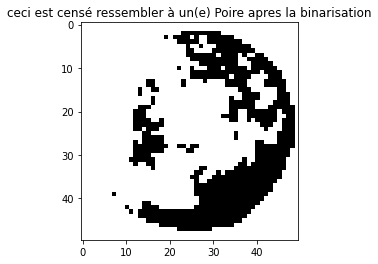

In [15]:

## Affichage d'une image
plt.figure()
n=1 # fruit a tester
plt.imshow(X_test[n].reshape(50,50) , cm.gray)
plt.title("ceci est censé ressembler à un(e) "+str(fruits[y_test[n]])+" apres la binarisation")
plt.show()

In [1]:
# ENTRAINEMENT
pkd , Pk = BayesienNaif_fit(X_train, np.array(y_train))

NameError: name 'BayesienNaif_fit' is not defined

## Résultat du modèle

In [18]:
# TEST
ypred = BayesienNaif_predict(X_test, pkd,Pk)
print("image test valeur réel : ",fruits[int(y_test[n])]," valeur prédite : ",fruits[int(ypred[n])])
print("Accuracy : ",(np.sum(y_test == ypred) / X_test.shape[0]) *100,"%")

image test valeur réel :  Poire  valeur prédite :  Poire
Accuracy :  85.08544795442776 %
